In [26]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Début de l'analyse de la BDD

In [13]:
print("--- Valeurs manquantes par colonne ---")
print(df.isnull().sum())

--- Valeurs manquantes par colonne ---
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [14]:
print("\n--- Statistiques des années de sortie ---")
print(df['release_year'].describe().round(1))


--- Statistiques des années de sortie ---
count    8807.0
mean     2014.2
std         8.8
min      1925.0
25%      2013.0
50%      2017.0
75%      2019.0
max      2021.0
Name: release_year, dtype: float64


### Début du Nettoyage des données 

In [ ]:
#On remplace les pays vides (831) par "Inconnu"
df['country'] = df['country'].fillna("Unknown")

In [16]:
#"On supprime les lignes où il manque des informations, 'dat_added', 'rating', 'duration' (très peu de lignes)
df = df.dropna(subset =["date_added", "rating", "duration"])


In [19]:
#Vérification - On ne veut plus de valeurs nulles sur ces colonnes 
print(df[["country", "date_added", "rating", "duration"]].isnull().sum())

country       0
date_added    0
rating        0
duration      0
dtype: int64


In [23]:
top_5_countries = df['country'].value_counts().head(5)
print("---Top 5 des Pays Producteurs---")
print(top_5_countries)

---Top 5 des Pays Producteurs---
country
United States     2809
India              972
Unknown            829
United Kingdom     418
Japan              243
Name: count, dtype: int64


In [25]:
top_5_genres = df["listed_in"].value_counts().head(5)
print("---Top 5 des Genres")
print(top_5_genres)

---Top 5 des Genres
listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Name: count, dtype: int64


### Visualisation de la donnée

In [ ]:
sns.set_theme(style="whitegrid")

C:\Users\G096103\AppData\Local\Temp\ipykernel_10380\1215343586.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_countries.values, y=top_5_countries.index, palette = "viridis")


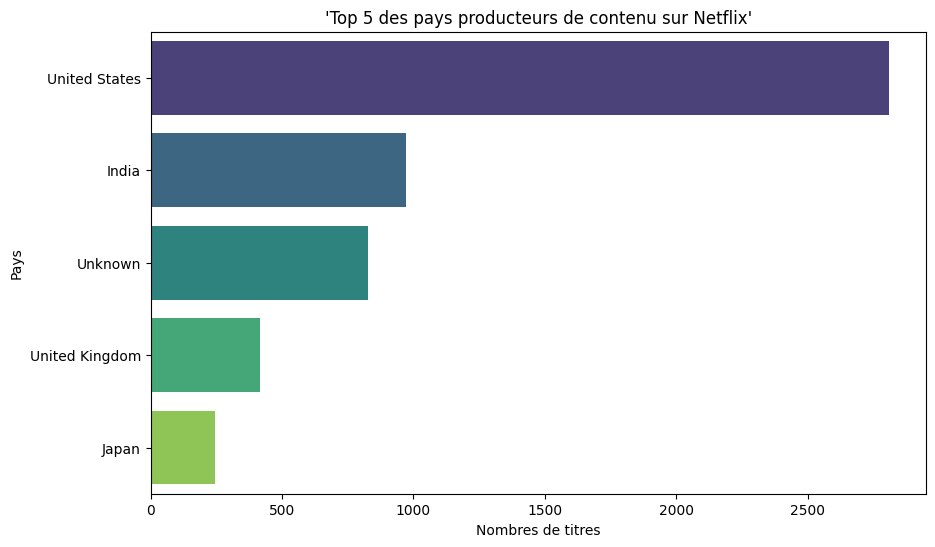

In [29]:
plt.figure(figsize = (10, 6))

sns.barplot(x=top_5_countries.values, y=top_5_countries.index, palette = "viridis")

plt.title("'Top 5 des pays producteurs de contenu sur Netflix'")
plt.xlabel("Nombres de titres")
plt.ylabel("Pays")
plt.show()

In [30]:
#On filtre les films après l'année 2000
df_recent = df[df["release_year"] >= 2000]

In [31]:
#On compte le nombre de contenus par année 
evolution = df_recent["release_year"].value_counts().sort_index()

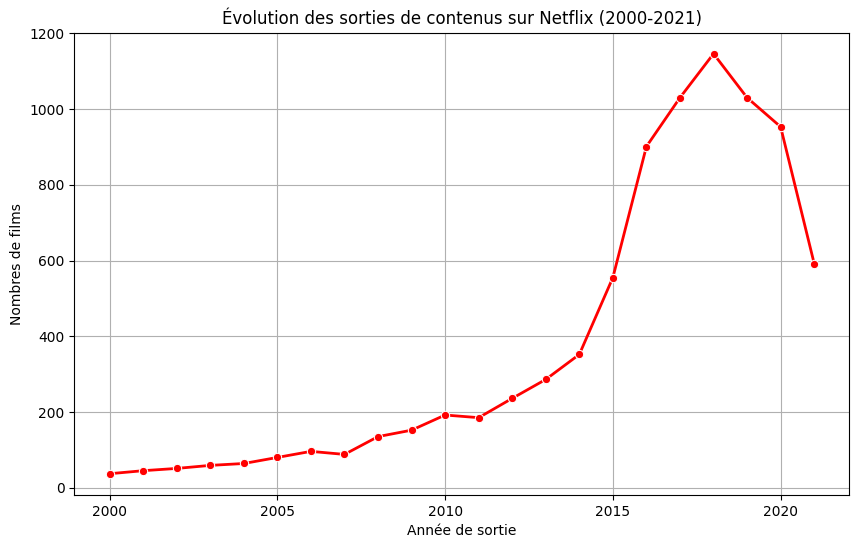

In [35]:
#Création graphique
plt.figure(figsize = (10,6))
sns.lineplot(x=evolution.index, y=evolution.values, marker='o', color='red', linewidth=2)

plt.title("Évolution des sorties de contenus sur Netflix (2000-2021)")
plt.xlabel("Année de sortie")
plt.ylabel("Nombres de films")
plt.grid(True)

plt.show()

#### On voit très clairement que le pic de nombre de films se situe en 2018 puis on voit un ralentissement en 2019 et 2020 surement du à la crise Covid qui a du bloquer/ralentir une partie des tournages 

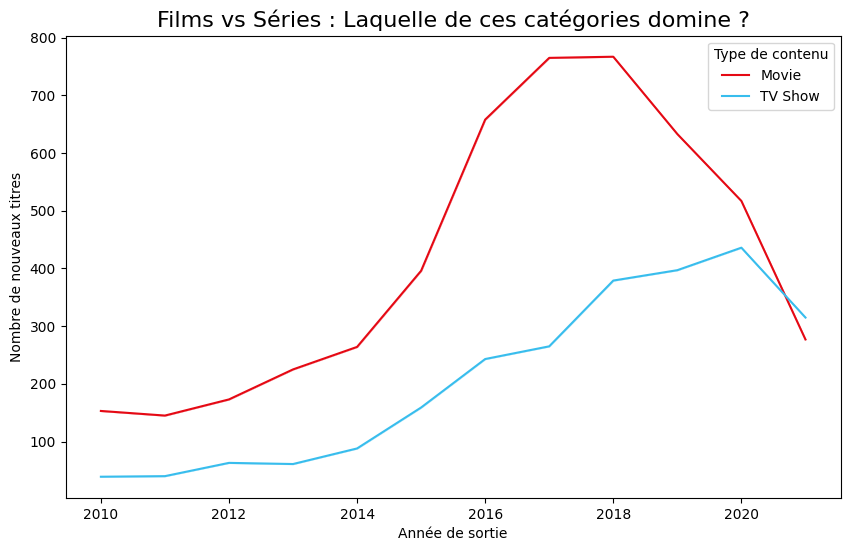

In [37]:
df_trends = df[df['release_year'] >= 2010]

plt.figure(figsize = (10,6))
sns.lineplot(data=df_trends, x='release_year', y=df_trends.index, 
             estimator=len, hue='type', palette=['#E50914', "#38bded"])

plt.title("Films vs Séries : Laquelle de ces catégories domine ?", fontsize=16)
plt.xlabel("Année de sortie")
plt.ylabel("Nombre de nouveaux titres")
plt.legend(title="Type de contenu")
plt.show()

#### On peut voir depuis 2010 que Netflix a bati son modèle sur les films. Cependant, la production de séries est beaucoup plus stable surtout face aux crises. 

### Conclusion 
#### L'Inde est le 2ème producteur mondial de films pour Netflix 
#### Le genre dominant est le Drame International